# Regression Exercise
Using Regression to predict wine quality.

## Import Our Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import scipy.stats as stats

%matplotlib inline

# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/winequality-white.csv`

In [2]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/winequality-white.csv')

# DISPLAY THE FIRST 5 ROWS
df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide    pH  sulphates  alcohol  \
0                 45.0                 170.0  3.00       0.45      8.8   
1                 14.0                 132.0  3.30       0.49      9.5   
2                 30.0                  97.0  3.26       0.44     10.1   
3                 47.0                 186.0  3.19       0.40      9.9   
4                 47.0                 186.0  3.19       0.40      9.9   

   quality  
0        6  
1        6  
2        6  
3        6  
4        6

# Inspect our data using `df.describe()` function.

In [3]:
# Inspect our data using `df.describe()` function.
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4893.000000       4893.000000  4893.000000     4893.000000   
mean        6.854210          0.278221     0.334139        6.393736   
std         0.843637          0.100831     0.121048        5.072990   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide           pH  \
count  4893.000000          4893.000000           4893.000000  4893.000000   
mean      0.045791            35.310035            138.383507     3.188144   
std       0.021850            17.011384             42.509982     0.151011   
min       0.009000             2.000000              9.000000     2.720000   
25%       0.036000            23.000000            108.000000     3.090000   
50%       0.043000            34.000000            134.000000     3.180000   
75%       0.050000            46.000000            167.000000     3.280000   
max       0.346000           289.000000            440.000000     3.820000   

         sulphates      alcohol      quality  
count  4893.000000  4893.000000  4893.000000  
mean      0.489871    10.512565     5.874719  
std       0.114151     1.229755     0.880446  
min       0.220000     8.000000     3.000000  
25%       0.410000     9.500000     5.000000  
50%       0.470000    10.400000     6.000000  
75%       0.550000    11.400000     6.000000  
max       1.080000    14.200000     8.000000

# Check for Nulls.

In [4]:
# Check for Nulls.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Check for Duplicates

In [5]:
# Check for Duplicates
df.duplicated().sum()

937

In [6]:
# Remove duplicates
print(df.shape)
df = df.drop_duplicates()

# Sanity check
print(df.shape)

(4893, 11)
(3956, 11)


# Visualize our data to discover outliers.
* Use `sns.pariplot`

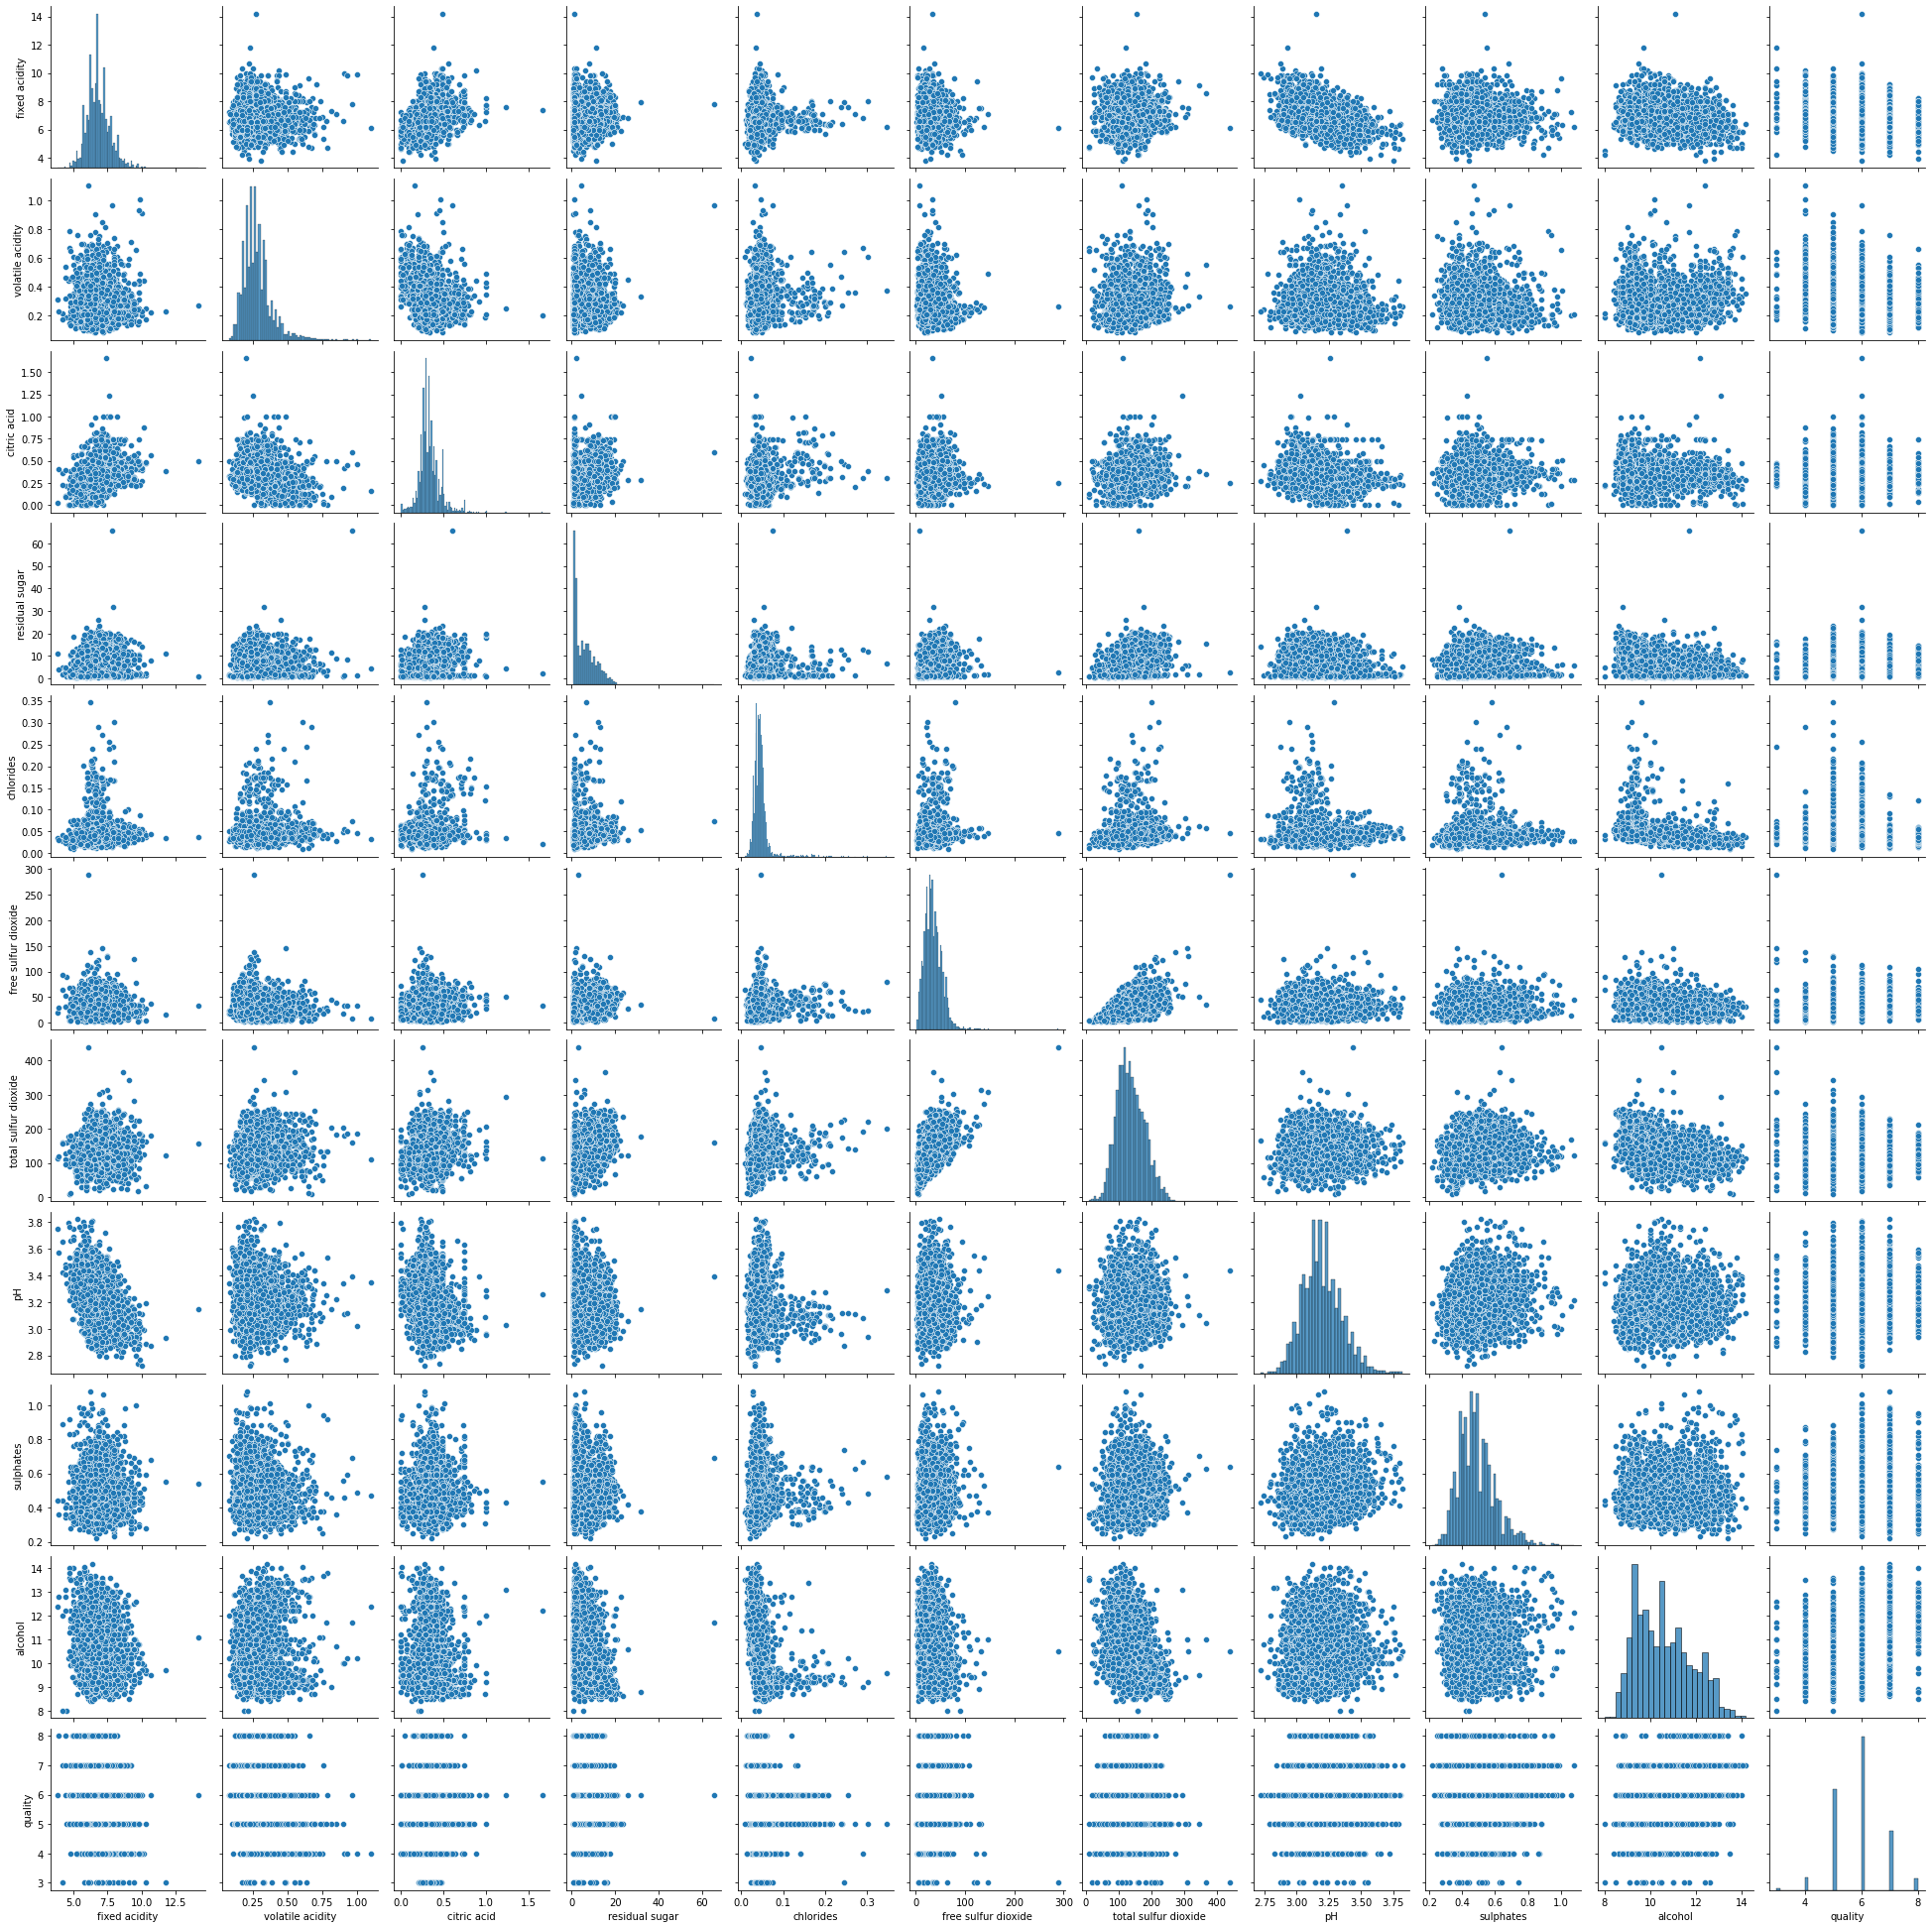

In [7]:
# Visualize our data to discover outliers.
sns.pairplot(data=df)

___
# STEP 2  (s):  Select and Engineer Features

# Remove outliers
* Make sure you DO NOT remove outliers from our target variable of `quality`.

In [8]:
# Keep this for later
original_cols = df.columns

# Set the columns you want to remove outliers for
target_cols = ['fixed acidity', 'volatile acidity', 'citric acid',
               'residual sugar', 'chlorides', 'free sulfur dioxide',
               'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']

# Make a new list that is going to contain our z-score
z_score_cols = []

# Loop through our target columns
for col in target_cols:
    # Make the new column name the same as the original but with 'z_score' added to it
    new_col_name = col + "_zscore"

    # Set the new column equal to the score
    df[new_col_name] = stats.zscore(df[col])

    # Set the z-score to its absolute value of the for easier filtering
    df[new_col_name] = abs(df[new_col_name])
    
    # Append the new column name our our z_score_cols list for easier access for later.
    z_score_cols.append(new_col_name)

# picking values only within 3 standard deviation
condition = df[z_score_cols] < 3

# Say TRUE only if all of the rows are True, else return False
condition = condition.all(axis=1)

print('Before removal of outliers', df.shape)

# Apply our condition to our dataframe and replace our current dataframe with the applied condition.
df = df[condition]

print('After removal of outliers', df.shape)

Before removal of outliers (3956, 21)
After removal of outliers (3629, 21)


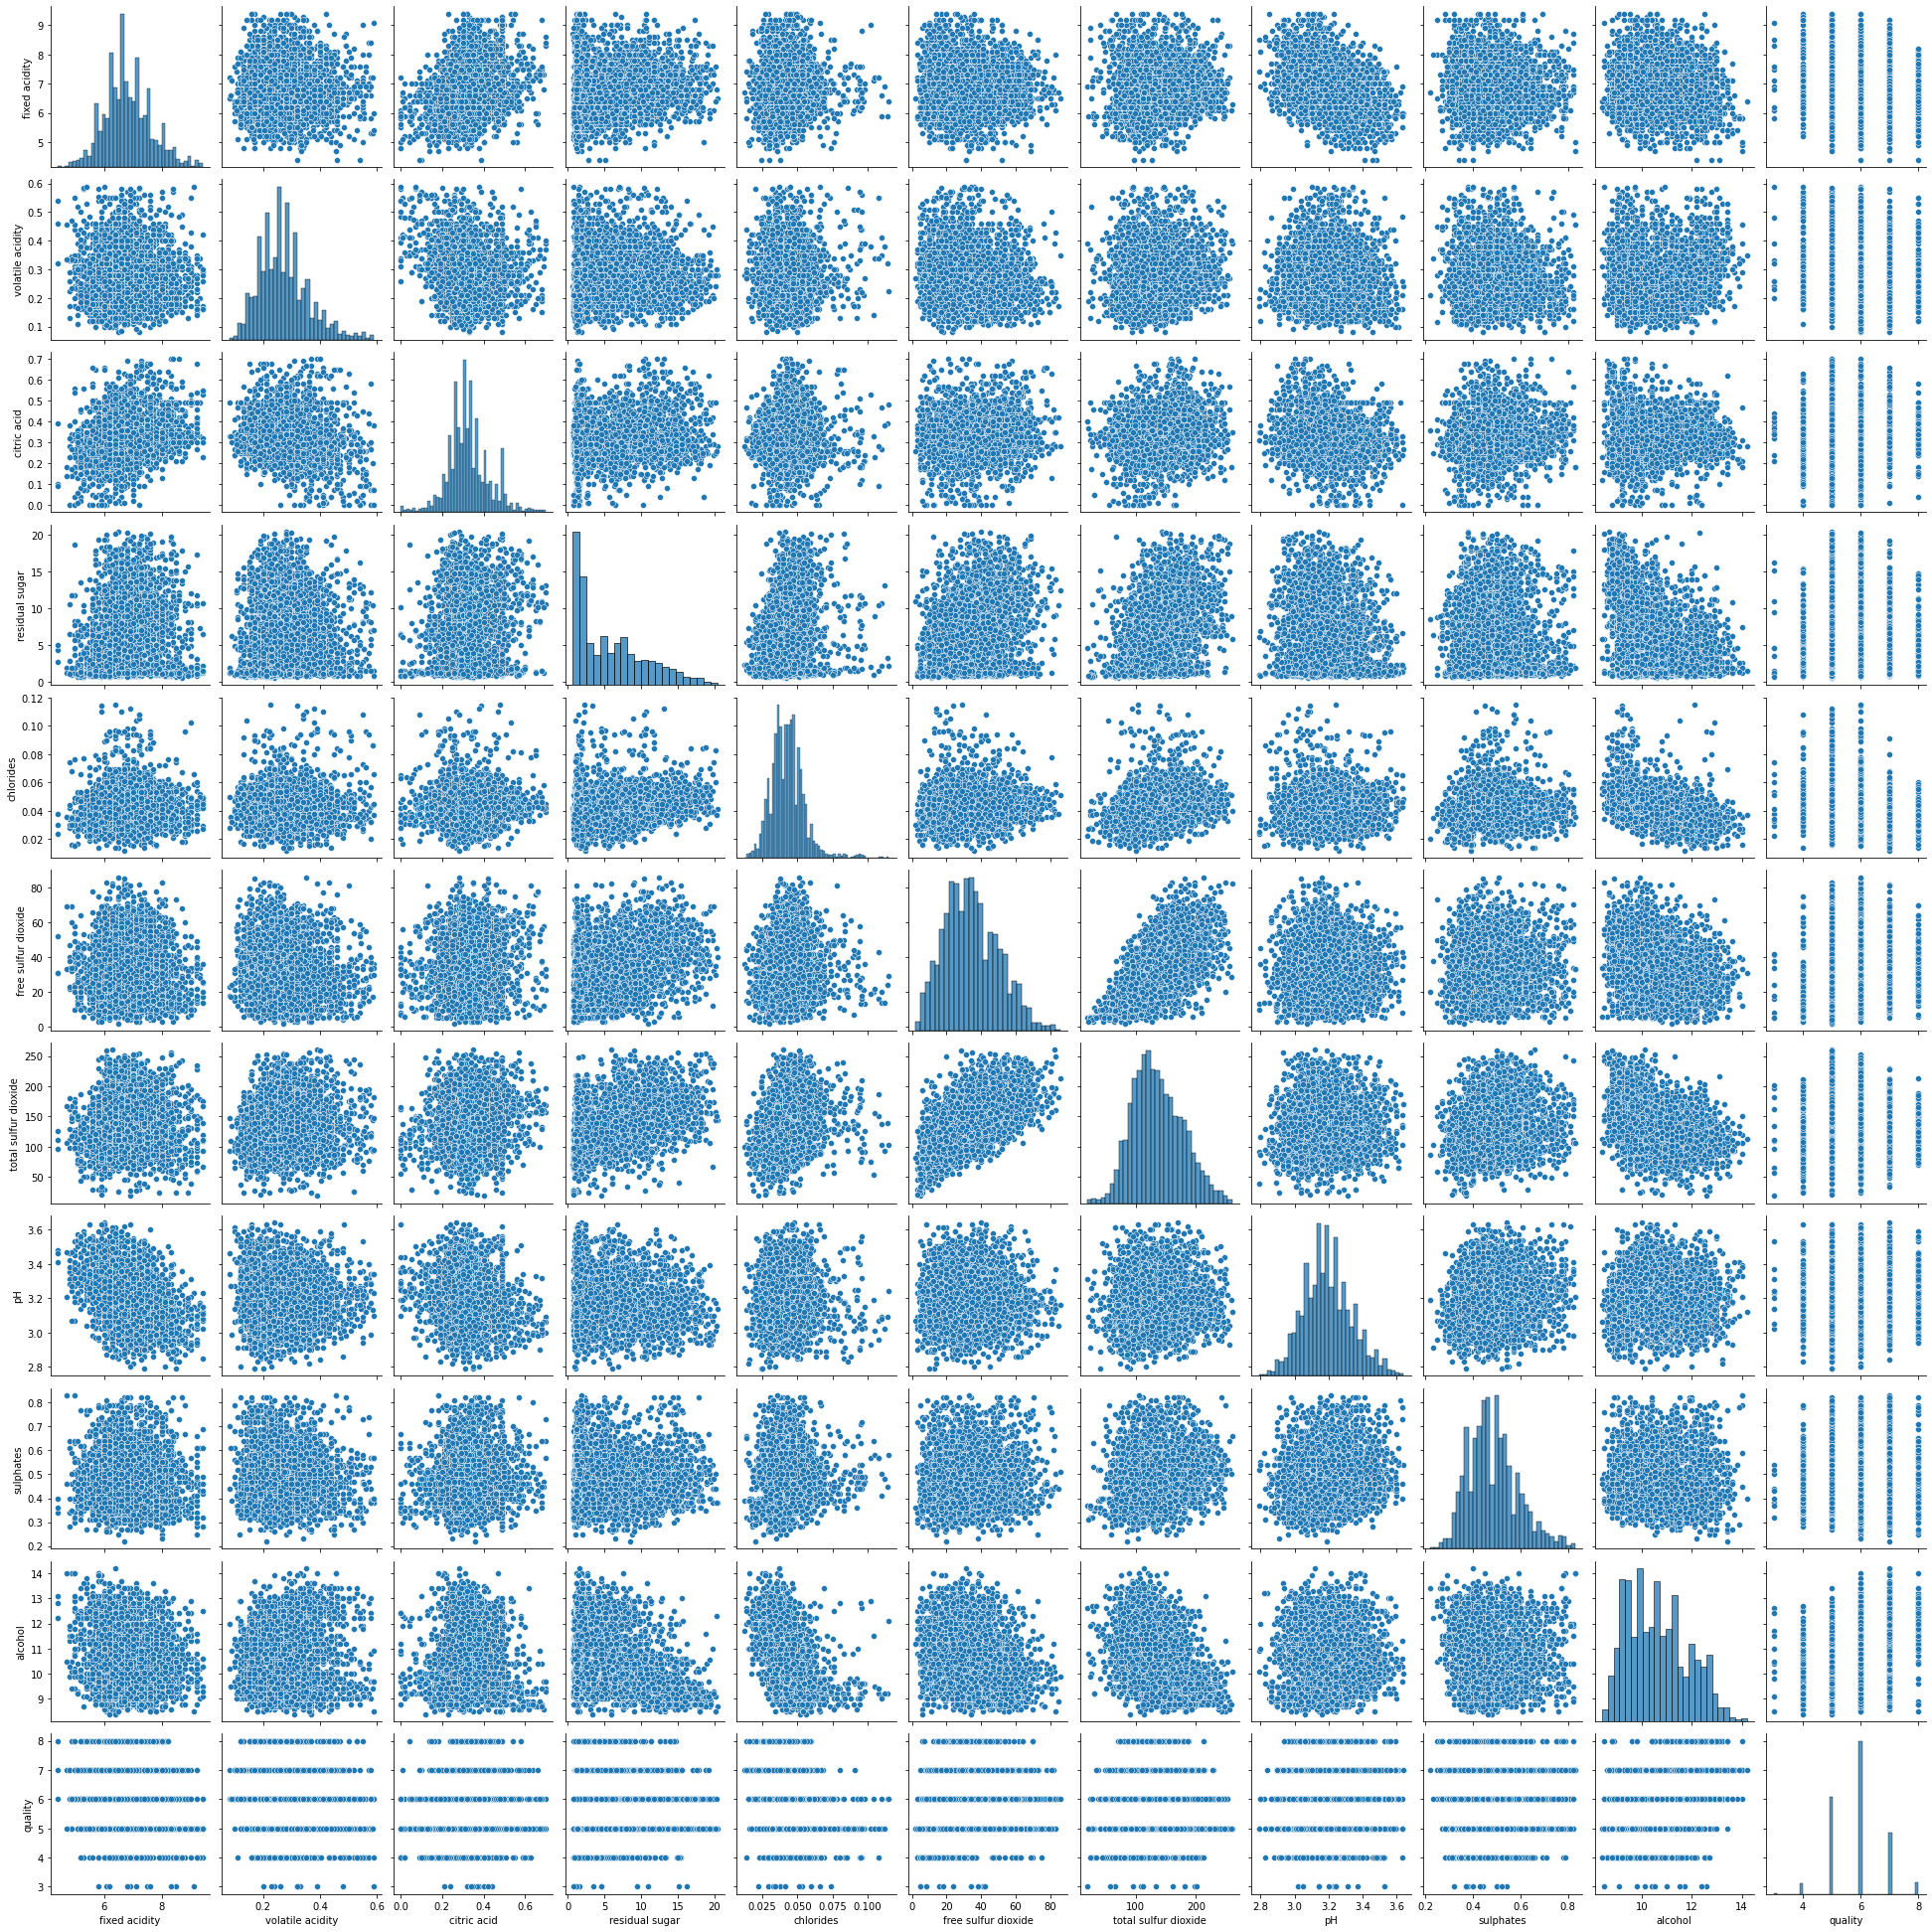

In [9]:
# Keep only original columns
df = df[original_cols]

# Visualize using sns.pairplot again to see if outliers were removed.
sns.pairplot(df)

# Find which features have a linear relationship with quality.
* Plot below the linear relationship between each variable against quality.
* Use `sns.relplot`

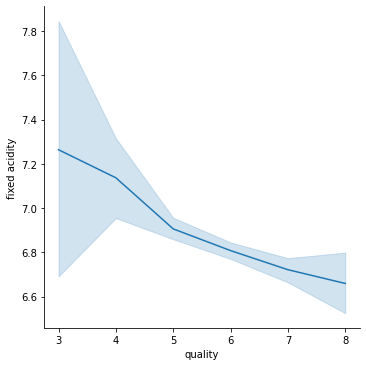

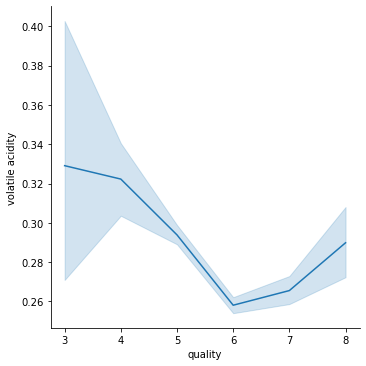

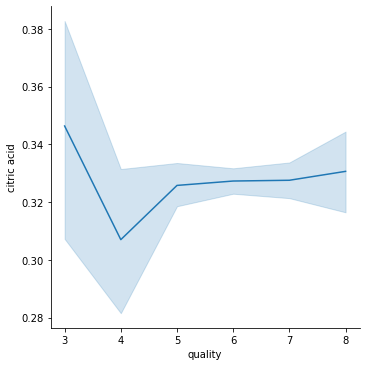

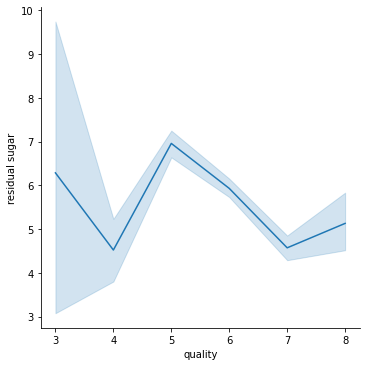

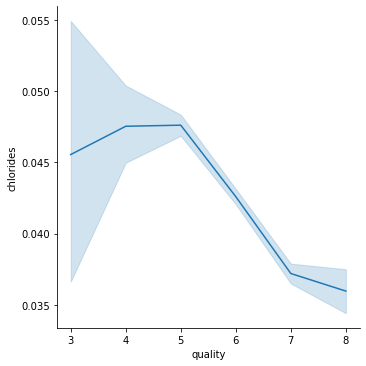

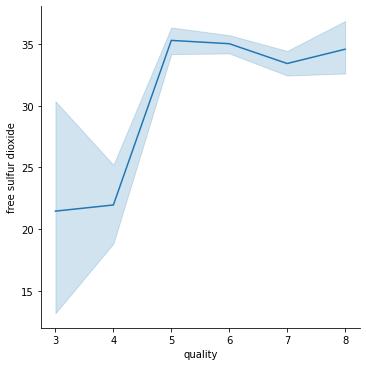

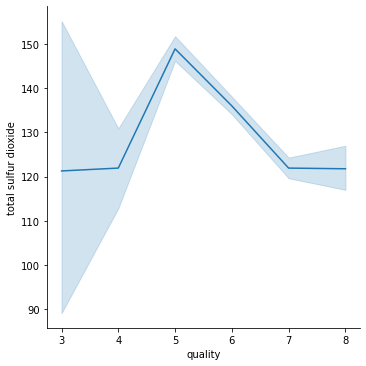

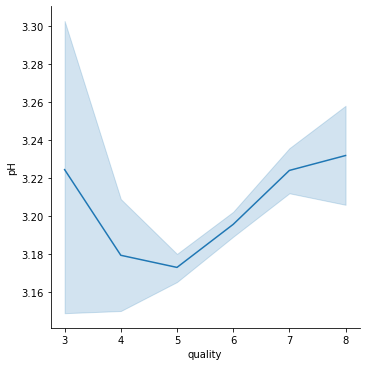

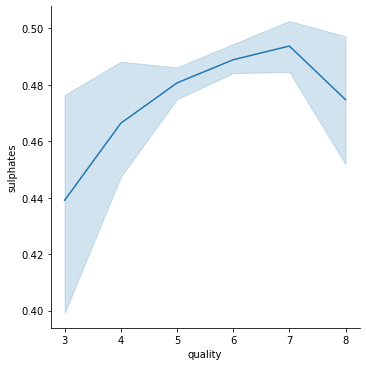

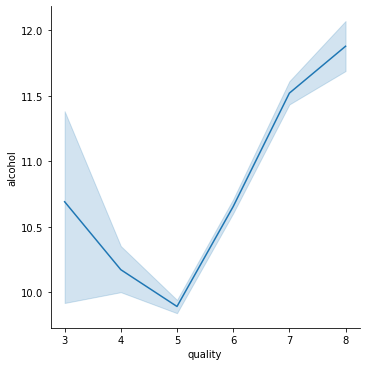

In [10]:
# Plot below the linear relationship between each variable against quality

all_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'pH', 'sulphates', 'alcohol']

# YOURE GOING TO NEED TO USE A LOOP
for feature in all_features:
    sns.relplot(data = df, y =feature, x= 'quality', kind = 'line', height = 5, aspect = 1)

# Select your predictor features and your target variable.
1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
2. Define your `X` and `y` variables
3. Split our data into a training set and a testing set.

In [11]:
# 1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
selected_features = ['fixed acidity', 'volatile acidity', 'free sulfur dioxide', 'chlorides', 'sulphates']

In [12]:
# Define your X and y variables
X = df[selected_features].values
y = df['quality'].values

In [13]:
# 3. Split our data into a training set and a testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

___
# STEP 3 (b): Build and train our model
1. Initialize our Linear Regression model.
2. Use our training data to fit aka train our model.


In [14]:
# 1. Initialize our Linear Regression model.

model = LinearRegression(n_jobs=11)

In [15]:
# 2. Use our training data to fit aka train our model.
model.fit(X_train, y_train)

LinearRegression(n_jobs=11)

___
# STEP 4 (e): Evaluate model.
1. Make new predicitions using our testing data.
2. Calculate R-Squared and Mean Absolute Error socres

In [16]:
# 1. Make new predicitions using our testing data.
y_pred = model.predict(X_test)

# Now lets see how well the model explains the data by finding the R-Squared.
* You can think of r-squared as a goodness of fit measure for the model. 
* How well the trendline explains the variance of the data. 
* R-squared measure the strength of the relationship between your model and the dependent variable on a 0-100% scale.
* Remember for human labeled data like the quality of wine, .3 is pretty good.

In [17]:
# 2. Calculate R-Squared and Mean Absolute Error socres

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

# USE SKLEARN'S MEAN_ABSOLUTE_ERROR FUNCTION TO SCORE OUR PREDICTIONS VS OUR ACTUAL
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

R-Squared Score: 0.1052820199986213
Mean Absolute Error: 0.636927642740009


# Saving and exporting our model for future use.
* Use the library pickle to export the pickle

In [18]:
import pickle

# NAME YOUR MODEL 
filename = 'white-wine-model.pkl'

# EXPORT AND SAVE YOUR MODEL USING YOUR FILENAME
pickle.dump(model, open(filename, 'wb'))

___
# Random Forest Regression

Without step by step guidance, in the cell below, build a Random Forest Regression model and compare the r-squared and mean absolute error scores to the Linear Regression model.
* Dont forget, Random Forest can handle non-linear features!

* When splitting your data, make sure to use the same random state as you did for your Linear Regression model
    * `train_test_split(???, random_state=1)`

* Dont forget about `GridSearchCV` from our last lecture :) 

1. Which model proved to have better scores.
2. Why do you think that is...?


In [19]:
# Do complete Random Forest Regression model here...

params = {
    'n_estimators' : [5, 10, 50, 100],
    'criterion' : ['mse', 'mae'],
    'max_depth': [5, 10, 50, 100], 
    'min_samples_split': [2, 10, 50, 100],
    'max_features': [2, 4, 'auto']
}

grid_search_cv = GridSearchCV(estimator = RandomForestRegressor(random_state = 42),
                              param_grid=params, scoring='r2', n_jobs=11, cv = 10, verbose = 100)
grid_search_cv.fit(X_train[:2000], y_train[:2000]) # training on partial set to make it quicker

Fitting 10 folds for each of 384 candidates, totalling 3840 fits
[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=11)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=11)]: Done   3 tasks      | elapsed:    0.7s
[Parallel(n_jobs=11)]: Done   4 tasks      | elapsed:    0.7s
[Parallel(n_jobs=11)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=11)]: Done   6 tasks      | elapsed:    0.7s
[Parallel(n_jobs=11)]: Done   7 tasks      | elapsed:    0.7s
[Parallel(n_jobs=11)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=11)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=11)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=11)]: Done  11 tasks      | elapsed:    0.7s
[Parallel(n_jobs=11)]: Done  12 tasks      | elapsed:    0.7s
[Parallel(n_jobs=11)]: Done  13 tasks      | elapsed:    0.7s
[Parallel(n_jobs=11)]: Done  14 tasks      | elapsed

[Parallel(n_jobs=11)]: Done 419 tasks      | elapsed:    4.5s
[Parallel(n_jobs=11)]: Done 427 tasks      | elapsed:    4.6s
[Parallel(n_jobs=11)]: Done 435 tasks      | elapsed:    4.6s
[Parallel(n_jobs=11)]: Done 443 tasks      | elapsed:    4.8s
[Parallel(n_jobs=11)]: Done 451 tasks      | elapsed:    4.9s
[Parallel(n_jobs=11)]: Done 459 tasks      | elapsed:    4.9s
[Parallel(n_jobs=11)]: Done 467 tasks      | elapsed:    5.0s
[Parallel(n_jobs=11)]: Done 475 tasks      | elapsed:    5.1s
[Parallel(n_jobs=11)]: Done 483 tasks      | elapsed:    5.1s
[Parallel(n_jobs=11)]: Done 491 tasks      | elapsed:    5.1s
[Parallel(n_jobs=11)]: Done 499 tasks      | elapsed:    5.2s
[Parallel(n_jobs=11)]: Done 507 tasks      | elapsed:    5.3s
[Parallel(n_jobs=11)]: Done 515 tasks      | elapsed:    5.4s
[Parallel(n_jobs=11)]: Done 523 tasks      | elapsed:    5.4s
[Parallel(n_jobs=11)]: Done 531 tasks      | elapsed:    5.5s
[Parallel(n_jobs=11)]: Done 539 tasks      | elapsed:    5.6s
[Paralle

[Parallel(n_jobs=11)]: Done 1056 tasks      | elapsed:   11.6s
[Parallel(n_jobs=11)]: Done 1058 tasks      | elapsed:   11.7s
[Parallel(n_jobs=11)]: Done 1060 tasks      | elapsed:   11.7s
[Parallel(n_jobs=11)]: Done 1062 tasks      | elapsed:   11.7s
[Parallel(n_jobs=11)]: Done 1064 tasks      | elapsed:   11.7s
[Parallel(n_jobs=11)]: Done 1066 tasks      | elapsed:   11.7s
[Parallel(n_jobs=11)]: Done 1068 tasks      | elapsed:   11.7s
[Parallel(n_jobs=11)]: Done 1070 tasks      | elapsed:   11.7s
[Parallel(n_jobs=11)]: Done 1072 tasks      | elapsed:   11.7s
[Parallel(n_jobs=11)]: Done 1074 tasks      | elapsed:   11.7s
[Parallel(n_jobs=11)]: Done 1076 tasks      | elapsed:   11.8s
[Parallel(n_jobs=11)]: Done 1078 tasks      | elapsed:   11.8s
[Parallel(n_jobs=11)]: Done 1080 tasks      | elapsed:   11.8s
[Parallel(n_jobs=11)]: Done 1082 tasks      | elapsed:   11.8s
[Parallel(n_jobs=11)]: Done 1084 tasks      | elapsed:   11.8s
[Parallel(n_jobs=11)]: Done 1086 tasks      | elapsed: 

[Parallel(n_jobs=11)]: Done 1318 tasks      | elapsed:   15.0s
[Parallel(n_jobs=11)]: Done 1320 tasks      | elapsed:   15.0s
[Parallel(n_jobs=11)]: Done 1322 tasks      | elapsed:   15.0s
[Parallel(n_jobs=11)]: Done 1324 tasks      | elapsed:   15.0s
[Parallel(n_jobs=11)]: Done 1326 tasks      | elapsed:   15.1s
[Parallel(n_jobs=11)]: Done 1328 tasks      | elapsed:   15.1s
[Parallel(n_jobs=11)]: Done 1330 tasks      | elapsed:   15.1s
[Parallel(n_jobs=11)]: Done 1332 tasks      | elapsed:   15.5s
[Parallel(n_jobs=11)]: Done 1334 tasks      | elapsed:   15.5s
[Parallel(n_jobs=11)]: Done 1336 tasks      | elapsed:   15.5s
[Parallel(n_jobs=11)]: Done 1338 tasks      | elapsed:   15.5s
[Parallel(n_jobs=11)]: Done 1340 tasks      | elapsed:   15.5s
[Parallel(n_jobs=11)]: Done 1342 tasks      | elapsed:   15.5s
[Parallel(n_jobs=11)]: Done 1344 tasks      | elapsed:   15.6s
[Parallel(n_jobs=11)]: Done 1346 tasks      | elapsed:   15.6s
[Parallel(n_jobs=11)]: Done 1348 tasks      | elapsed: 

[Parallel(n_jobs=11)]: Done 1602 tasks      | elapsed:   18.6s
[Parallel(n_jobs=11)]: Done 1604 tasks      | elapsed:   18.7s
[Parallel(n_jobs=11)]: Done 1606 tasks      | elapsed:   18.7s
[Parallel(n_jobs=11)]: Done 1608 tasks      | elapsed:   18.7s
[Parallel(n_jobs=11)]: Done 1610 tasks      | elapsed:   18.7s
[Parallel(n_jobs=11)]: Done 1612 tasks      | elapsed:   18.7s
[Parallel(n_jobs=11)]: Done 1614 tasks      | elapsed:   18.8s
[Parallel(n_jobs=11)]: Done 1616 tasks      | elapsed:   18.9s
[Parallel(n_jobs=11)]: Done 1618 tasks      | elapsed:   18.9s
[Parallel(n_jobs=11)]: Done 1620 tasks      | elapsed:   18.9s
[Parallel(n_jobs=11)]: Done 1622 tasks      | elapsed:   19.0s
[Parallel(n_jobs=11)]: Done 1624 tasks      | elapsed:   19.0s
[Parallel(n_jobs=11)]: Done 1626 tasks      | elapsed:   19.1s
[Parallel(n_jobs=11)]: Done 1628 tasks      | elapsed:   19.1s
[Parallel(n_jobs=11)]: Done 1630 tasks      | elapsed:   19.1s
[Parallel(n_jobs=11)]: Done 1632 tasks      | elapsed: 

[Parallel(n_jobs=11)]: Done 1872 tasks      | elapsed:   22.6s
[Parallel(n_jobs=11)]: Done 1874 tasks      | elapsed:   22.7s
[Parallel(n_jobs=11)]: Done 1876 tasks      | elapsed:   22.7s
[Parallel(n_jobs=11)]: Done 1878 tasks      | elapsed:   22.8s
[Parallel(n_jobs=11)]: Done 1880 tasks      | elapsed:   22.8s
[Parallel(n_jobs=11)]: Done 1882 tasks      | elapsed:   22.8s
[Parallel(n_jobs=11)]: Done 1884 tasks      | elapsed:   22.8s
[Parallel(n_jobs=11)]: Done 1886 tasks      | elapsed:   22.8s
[Parallel(n_jobs=11)]: Done 1888 tasks      | elapsed:   22.8s
[Parallel(n_jobs=11)]: Done 1890 tasks      | elapsed:   22.8s
[Parallel(n_jobs=11)]: Done 1892 tasks      | elapsed:   23.0s
[Parallel(n_jobs=11)]: Done 1894 tasks      | elapsed:   23.1s
[Parallel(n_jobs=11)]: Done 1896 tasks      | elapsed:   23.1s
[Parallel(n_jobs=11)]: Done 1898 tasks      | elapsed:   23.1s
[Parallel(n_jobs=11)]: Done 1900 tasks      | elapsed:   23.1s
[Parallel(n_jobs=11)]: Done 1902 tasks      | elapsed: 

[Parallel(n_jobs=11)]: Done 2086 tasks      | elapsed:   34.7s
[Parallel(n_jobs=11)]: Done 2087 tasks      | elapsed:   34.7s
[Parallel(n_jobs=11)]: Done 2088 tasks      | elapsed:   34.7s
[Parallel(n_jobs=11)]: Done 2089 tasks      | elapsed:   34.8s
[Parallel(n_jobs=11)]: Done 2090 tasks      | elapsed:   34.9s
[Parallel(n_jobs=11)]: Done 2091 tasks      | elapsed:   34.9s
[Parallel(n_jobs=11)]: Done 2092 tasks      | elapsed:   34.9s
[Parallel(n_jobs=11)]: Done 2093 tasks      | elapsed:   34.9s
[Parallel(n_jobs=11)]: Done 2094 tasks      | elapsed:   34.9s
[Parallel(n_jobs=11)]: Done 2095 tasks      | elapsed:   35.0s
[Parallel(n_jobs=11)]: Done 2096 tasks      | elapsed:   35.0s
[Parallel(n_jobs=11)]: Done 2097 tasks      | elapsed:   35.0s
[Parallel(n_jobs=11)]: Done 2098 tasks      | elapsed:   35.0s
[Parallel(n_jobs=11)]: Done 2099 tasks      | elapsed:   35.1s
[Parallel(n_jobs=11)]: Done 2100 tasks      | elapsed:   35.5s
[Parallel(n_jobs=11)]: Done 2101 tasks      | elapsed: 

[Parallel(n_jobs=11)]: Done 2221 tasks      | elapsed:   50.1s
[Parallel(n_jobs=11)]: Done 2222 tasks      | elapsed:   50.1s
[Parallel(n_jobs=11)]: Done 2223 tasks      | elapsed:   50.1s
[Parallel(n_jobs=11)]: Done 2224 tasks      | elapsed:   50.2s
[Parallel(n_jobs=11)]: Done 2225 tasks      | elapsed:   50.2s
[Parallel(n_jobs=11)]: Done 2226 tasks      | elapsed:   50.2s
[Parallel(n_jobs=11)]: Done 2227 tasks      | elapsed:   50.3s
[Parallel(n_jobs=11)]: Done 2228 tasks      | elapsed:   50.4s
[Parallel(n_jobs=11)]: Done 2229 tasks      | elapsed:   50.4s
[Parallel(n_jobs=11)]: Done 2230 tasks      | elapsed:   50.5s
[Parallel(n_jobs=11)]: Done 2231 tasks      | elapsed:   50.6s
[Parallel(n_jobs=11)]: Done 2232 tasks      | elapsed:   50.8s
[Parallel(n_jobs=11)]: Done 2233 tasks      | elapsed:   51.0s
[Parallel(n_jobs=11)]: Done 2234 tasks      | elapsed:   51.2s
[Parallel(n_jobs=11)]: Done 2235 tasks      | elapsed:   51.3s
[Parallel(n_jobs=11)]: Done 2236 tasks      | elapsed: 

[Parallel(n_jobs=11)]: Done 2352 tasks      | elapsed:  1.1min
[Parallel(n_jobs=11)]: Done 2353 tasks      | elapsed:  1.1min
[Parallel(n_jobs=11)]: Done 2354 tasks      | elapsed:  1.1min
[Parallel(n_jobs=11)]: Done 2355 tasks      | elapsed:  1.1min
[Parallel(n_jobs=11)]: Done 2356 tasks      | elapsed:  1.1min
[Parallel(n_jobs=11)]: Done 2357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=11)]: Done 2358 tasks      | elapsed:  1.1min
[Parallel(n_jobs=11)]: Done 2359 tasks      | elapsed:  1.1min
[Parallel(n_jobs=11)]: Done 2360 tasks      | elapsed:  1.1min
[Parallel(n_jobs=11)]: Done 2361 tasks      | elapsed:  1.1min
[Parallel(n_jobs=11)]: Done 2362 tasks      | elapsed:  1.1min
[Parallel(n_jobs=11)]: Done 2363 tasks      | elapsed:  1.1min
[Parallel(n_jobs=11)]: Done 2364 tasks      | elapsed:  1.1min
[Parallel(n_jobs=11)]: Done 2365 tasks      | elapsed:  1.1min
[Parallel(n_jobs=11)]: Done 2366 tasks      | elapsed:  1.1min
[Parallel(n_jobs=11)]: Done 2367 tasks      | elapsed: 

[Parallel(n_jobs=11)]: Done 2484 tasks      | elapsed:  1.4min
[Parallel(n_jobs=11)]: Done 2485 tasks      | elapsed:  1.4min
[Parallel(n_jobs=11)]: Done 2486 tasks      | elapsed:  1.4min
[Parallel(n_jobs=11)]: Done 2487 tasks      | elapsed:  1.4min
[Parallel(n_jobs=11)]: Done 2488 tasks      | elapsed:  1.4min
[Parallel(n_jobs=11)]: Done 2489 tasks      | elapsed:  1.4min
[Parallel(n_jobs=11)]: Done 2490 tasks      | elapsed:  1.4min
[Parallel(n_jobs=11)]: Done 2491 tasks      | elapsed:  1.4min
[Parallel(n_jobs=11)]: Done 2492 tasks      | elapsed:  1.4min
[Parallel(n_jobs=11)]: Done 2493 tasks      | elapsed:  1.4min
[Parallel(n_jobs=11)]: Done 2494 tasks      | elapsed:  1.4min
[Parallel(n_jobs=11)]: Done 2495 tasks      | elapsed:  1.4min
[Parallel(n_jobs=11)]: Done 2496 tasks      | elapsed:  1.4min
[Parallel(n_jobs=11)]: Done 2497 tasks      | elapsed:  1.4min
[Parallel(n_jobs=11)]: Done 2498 tasks      | elapsed:  1.4min
[Parallel(n_jobs=11)]: Done 2499 tasks      | elapsed: 

[Parallel(n_jobs=11)]: Done 2615 tasks      | elapsed:  1.7min
[Parallel(n_jobs=11)]: Done 2616 tasks      | elapsed:  1.7min
[Parallel(n_jobs=11)]: Done 2617 tasks      | elapsed:  1.7min
[Parallel(n_jobs=11)]: Done 2618 tasks      | elapsed:  1.7min
[Parallel(n_jobs=11)]: Done 2619 tasks      | elapsed:  1.7min
[Parallel(n_jobs=11)]: Done 2620 tasks      | elapsed:  1.7min
[Parallel(n_jobs=11)]: Done 2621 tasks      | elapsed:  1.7min
[Parallel(n_jobs=11)]: Done 2622 tasks      | elapsed:  1.7min
[Parallel(n_jobs=11)]: Done 2623 tasks      | elapsed:  1.7min
[Parallel(n_jobs=11)]: Done 2624 tasks      | elapsed:  1.7min
[Parallel(n_jobs=11)]: Done 2625 tasks      | elapsed:  1.7min
[Parallel(n_jobs=11)]: Done 2626 tasks      | elapsed:  1.7min
[Parallel(n_jobs=11)]: Done 2627 tasks      | elapsed:  1.7min
[Parallel(n_jobs=11)]: Done 2628 tasks      | elapsed:  1.7min
[Parallel(n_jobs=11)]: Done 2629 tasks      | elapsed:  1.7min
[Parallel(n_jobs=11)]: Done 2630 tasks      | elapsed: 

[Parallel(n_jobs=11)]: Done 2747 tasks      | elapsed:  2.1min
[Parallel(n_jobs=11)]: Done 2748 tasks      | elapsed:  2.1min
[Parallel(n_jobs=11)]: Done 2749 tasks      | elapsed:  2.1min
[Parallel(n_jobs=11)]: Done 2750 tasks      | elapsed:  2.1min
[Parallel(n_jobs=11)]: Done 2751 tasks      | elapsed:  2.2min
[Parallel(n_jobs=11)]: Done 2752 tasks      | elapsed:  2.2min
[Parallel(n_jobs=11)]: Done 2753 tasks      | elapsed:  2.2min
[Parallel(n_jobs=11)]: Done 2754 tasks      | elapsed:  2.2min
[Parallel(n_jobs=11)]: Done 2755 tasks      | elapsed:  2.2min
[Parallel(n_jobs=11)]: Done 2756 tasks      | elapsed:  2.2min
[Parallel(n_jobs=11)]: Done 2757 tasks      | elapsed:  2.2min
[Parallel(n_jobs=11)]: Done 2758 tasks      | elapsed:  2.2min
[Parallel(n_jobs=11)]: Done 2759 tasks      | elapsed:  2.2min
[Parallel(n_jobs=11)]: Done 2760 tasks      | elapsed:  2.2min
[Parallel(n_jobs=11)]: Done 2761 tasks      | elapsed:  2.2min
[Parallel(n_jobs=11)]: Done 2762 tasks      | elapsed: 

[Parallel(n_jobs=11)]: Done 2878 tasks      | elapsed:  2.7min
[Parallel(n_jobs=11)]: Done 2879 tasks      | elapsed:  2.7min
[Parallel(n_jobs=11)]: Done 2880 tasks      | elapsed:  2.7min
[Parallel(n_jobs=11)]: Done 2881 tasks      | elapsed:  2.7min
[Parallel(n_jobs=11)]: Done 2882 tasks      | elapsed:  2.7min
[Parallel(n_jobs=11)]: Done 2883 tasks      | elapsed:  2.7min
[Parallel(n_jobs=11)]: Done 2884 tasks      | elapsed:  2.7min
[Parallel(n_jobs=11)]: Done 2885 tasks      | elapsed:  2.7min
[Parallel(n_jobs=11)]: Done 2886 tasks      | elapsed:  2.7min
[Parallel(n_jobs=11)]: Done 2887 tasks      | elapsed:  2.7min
[Parallel(n_jobs=11)]: Done 2888 tasks      | elapsed:  2.7min
[Parallel(n_jobs=11)]: Done 2889 tasks      | elapsed:  2.7min
[Parallel(n_jobs=11)]: Done 2890 tasks      | elapsed:  2.7min
[Parallel(n_jobs=11)]: Done 2891 tasks      | elapsed:  2.7min
[Parallel(n_jobs=11)]: Done 2892 tasks      | elapsed:  2.7min
[Parallel(n_jobs=11)]: Done 2893 tasks      | elapsed: 

[Parallel(n_jobs=11)]: Done 3009 tasks      | elapsed:  3.2min
[Parallel(n_jobs=11)]: Done 3010 tasks      | elapsed:  3.2min
[Parallel(n_jobs=11)]: Done 3011 tasks      | elapsed:  3.2min
[Parallel(n_jobs=11)]: Done 3012 tasks      | elapsed:  3.2min
[Parallel(n_jobs=11)]: Done 3013 tasks      | elapsed:  3.2min
[Parallel(n_jobs=11)]: Done 3014 tasks      | elapsed:  3.2min
[Parallel(n_jobs=11)]: Done 3015 tasks      | elapsed:  3.2min
[Parallel(n_jobs=11)]: Done 3016 tasks      | elapsed:  3.2min
[Parallel(n_jobs=11)]: Done 3017 tasks      | elapsed:  3.2min
[Parallel(n_jobs=11)]: Done 3018 tasks      | elapsed:  3.2min
[Parallel(n_jobs=11)]: Done 3019 tasks      | elapsed:  3.2min
[Parallel(n_jobs=11)]: Done 3020 tasks      | elapsed:  3.2min
[Parallel(n_jobs=11)]: Done 3021 tasks      | elapsed:  3.2min
[Parallel(n_jobs=11)]: Done 3022 tasks      | elapsed:  3.2min
[Parallel(n_jobs=11)]: Done 3023 tasks      | elapsed:  3.2min
[Parallel(n_jobs=11)]: Done 3024 tasks      | elapsed: 

[Parallel(n_jobs=11)]: Done 3140 tasks      | elapsed:  3.9min
[Parallel(n_jobs=11)]: Done 3141 tasks      | elapsed:  3.9min
[Parallel(n_jobs=11)]: Done 3142 tasks      | elapsed:  4.0min
[Parallel(n_jobs=11)]: Done 3143 tasks      | elapsed:  4.0min
[Parallel(n_jobs=11)]: Done 3144 tasks      | elapsed:  4.0min
[Parallel(n_jobs=11)]: Done 3145 tasks      | elapsed:  4.0min
[Parallel(n_jobs=11)]: Done 3146 tasks      | elapsed:  4.0min
[Parallel(n_jobs=11)]: Done 3147 tasks      | elapsed:  4.0min
[Parallel(n_jobs=11)]: Done 3148 tasks      | elapsed:  4.0min
[Parallel(n_jobs=11)]: Done 3149 tasks      | elapsed:  4.0min
[Parallel(n_jobs=11)]: Done 3150 tasks      | elapsed:  4.0min
[Parallel(n_jobs=11)]: Done 3151 tasks      | elapsed:  4.0min
[Parallel(n_jobs=11)]: Done 3152 tasks      | elapsed:  4.0min
[Parallel(n_jobs=11)]: Done 3153 tasks      | elapsed:  4.0min
[Parallel(n_jobs=11)]: Done 3154 tasks      | elapsed:  4.0min
[Parallel(n_jobs=11)]: Done 3155 tasks      | elapsed: 

[Parallel(n_jobs=11)]: Done 3271 tasks      | elapsed:  4.9min
[Parallel(n_jobs=11)]: Done 3272 tasks      | elapsed:  4.9min
[Parallel(n_jobs=11)]: Done 3273 tasks      | elapsed:  4.9min
[Parallel(n_jobs=11)]: Done 3274 tasks      | elapsed:  4.9min
[Parallel(n_jobs=11)]: Done 3275 tasks      | elapsed:  4.9min
[Parallel(n_jobs=11)]: Done 3276 tasks      | elapsed:  4.9min
[Parallel(n_jobs=11)]: Done 3277 tasks      | elapsed:  4.9min
[Parallel(n_jobs=11)]: Done 3278 tasks      | elapsed:  4.9min
[Parallel(n_jobs=11)]: Done 3279 tasks      | elapsed:  4.9min
[Parallel(n_jobs=11)]: Done 3280 tasks      | elapsed:  5.0min
[Parallel(n_jobs=11)]: Done 3281 tasks      | elapsed:  5.0min
[Parallel(n_jobs=11)]: Done 3282 tasks      | elapsed:  5.0min
[Parallel(n_jobs=11)]: Done 3283 tasks      | elapsed:  5.0min
[Parallel(n_jobs=11)]: Done 3284 tasks      | elapsed:  5.0min
[Parallel(n_jobs=11)]: Done 3285 tasks      | elapsed:  5.0min
[Parallel(n_jobs=11)]: Done 3286 tasks      | elapsed: 

[Parallel(n_jobs=11)]: Done 3402 tasks      | elapsed:  5.8min
[Parallel(n_jobs=11)]: Done 3403 tasks      | elapsed:  5.8min
[Parallel(n_jobs=11)]: Done 3404 tasks      | elapsed:  5.8min
[Parallel(n_jobs=11)]: Done 3405 tasks      | elapsed:  5.8min
[Parallel(n_jobs=11)]: Done 3406 tasks      | elapsed:  5.8min
[Parallel(n_jobs=11)]: Done 3407 tasks      | elapsed:  5.8min
[Parallel(n_jobs=11)]: Done 3408 tasks      | elapsed:  5.8min
[Parallel(n_jobs=11)]: Done 3409 tasks      | elapsed:  5.8min
[Parallel(n_jobs=11)]: Done 3410 tasks      | elapsed:  5.8min
[Parallel(n_jobs=11)]: Done 3411 tasks      | elapsed:  5.8min
[Parallel(n_jobs=11)]: Done 3412 tasks      | elapsed:  5.8min
[Parallel(n_jobs=11)]: Done 3413 tasks      | elapsed:  5.8min
[Parallel(n_jobs=11)]: Done 3414 tasks      | elapsed:  5.8min
[Parallel(n_jobs=11)]: Done 3415 tasks      | elapsed:  5.8min
[Parallel(n_jobs=11)]: Done 3416 tasks      | elapsed:  5.8min
[Parallel(n_jobs=11)]: Done 3417 tasks      | elapsed: 

[Parallel(n_jobs=11)]: Done 3535 tasks      | elapsed:  6.3min
[Parallel(n_jobs=11)]: Done 3536 tasks      | elapsed:  6.3min
[Parallel(n_jobs=11)]: Done 3537 tasks      | elapsed:  6.3min
[Parallel(n_jobs=11)]: Done 3538 tasks      | elapsed:  6.3min
[Parallel(n_jobs=11)]: Done 3539 tasks      | elapsed:  6.3min
[Parallel(n_jobs=11)]: Done 3540 tasks      | elapsed:  6.3min
[Parallel(n_jobs=11)]: Done 3541 tasks      | elapsed:  6.3min
[Parallel(n_jobs=11)]: Done 3542 tasks      | elapsed:  6.3min
[Parallel(n_jobs=11)]: Done 3543 tasks      | elapsed:  6.4min
[Parallel(n_jobs=11)]: Done 3544 tasks      | elapsed:  6.4min
[Parallel(n_jobs=11)]: Done 3545 tasks      | elapsed:  6.4min
[Parallel(n_jobs=11)]: Done 3546 tasks      | elapsed:  6.4min
[Parallel(n_jobs=11)]: Done 3547 tasks      | elapsed:  6.4min
[Parallel(n_jobs=11)]: Done 3548 tasks      | elapsed:  6.4min
[Parallel(n_jobs=11)]: Done 3549 tasks      | elapsed:  6.4min
[Parallel(n_jobs=11)]: Done 3550 tasks      | elapsed: 

[Parallel(n_jobs=11)]: Done 3666 tasks      | elapsed:  7.1min
[Parallel(n_jobs=11)]: Done 3667 tasks      | elapsed:  7.2min
[Parallel(n_jobs=11)]: Done 3668 tasks      | elapsed:  7.2min
[Parallel(n_jobs=11)]: Done 3669 tasks      | elapsed:  7.2min
[Parallel(n_jobs=11)]: Done 3670 tasks      | elapsed:  7.2min
[Parallel(n_jobs=11)]: Done 3671 tasks      | elapsed:  7.2min
[Parallel(n_jobs=11)]: Done 3672 tasks      | elapsed:  7.2min
[Parallel(n_jobs=11)]: Done 3673 tasks      | elapsed:  7.2min
[Parallel(n_jobs=11)]: Done 3674 tasks      | elapsed:  7.2min
[Parallel(n_jobs=11)]: Done 3675 tasks      | elapsed:  7.2min
[Parallel(n_jobs=11)]: Done 3676 tasks      | elapsed:  7.2min
[Parallel(n_jobs=11)]: Done 3677 tasks      | elapsed:  7.2min
[Parallel(n_jobs=11)]: Done 3678 tasks      | elapsed:  7.2min
[Parallel(n_jobs=11)]: Done 3679 tasks      | elapsed:  7.3min
[Parallel(n_jobs=11)]: Done 3680 tasks      | elapsed:  7.3min
[Parallel(n_jobs=11)]: Done 3681 tasks      | elapsed: 

[Parallel(n_jobs=11)]: Done 3797 tasks      | elapsed:  8.2min
[Parallel(n_jobs=11)]: Done 3798 tasks      | elapsed:  8.2min
[Parallel(n_jobs=11)]: Done 3799 tasks      | elapsed:  8.2min
[Parallel(n_jobs=11)]: Done 3800 tasks      | elapsed:  8.2min
[Parallel(n_jobs=11)]: Done 3801 tasks      | elapsed:  8.2min
[Parallel(n_jobs=11)]: Done 3802 tasks      | elapsed:  8.2min
[Parallel(n_jobs=11)]: Done 3803 tasks      | elapsed:  8.2min
[Parallel(n_jobs=11)]: Done 3804 tasks      | elapsed:  8.2min
[Parallel(n_jobs=11)]: Done 3805 tasks      | elapsed:  8.2min
[Parallel(n_jobs=11)]: Done 3806 tasks      | elapsed:  8.2min
[Parallel(n_jobs=11)]: Done 3807 tasks      | elapsed:  8.3min
[Parallel(n_jobs=11)]: Done 3808 tasks      | elapsed:  8.3min
[Parallel(n_jobs=11)]: Done 3809 tasks      | elapsed:  8.3min
[Parallel(n_jobs=11)]: Done 3810 tasks      | elapsed:  8.3min
[Parallel(n_jobs=11)]: Done 3811 tasks      | elapsed:  8.3min
[Parallel(n_jobs=11)]: Done 3812 tasks      | elapsed: 

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=11,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [5, 10, 50, 100],
                         'max_features': [2, 4, 'auto'],
                         'min_samples_split': [2, 10, 50, 100],
                         'n_estimators': [5, 10, 50, 100]},
             scoring='r2', verbose=100)

In [20]:
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)
new_model = grid_search_cv.best_estimator_

{'criterion': 'mse', 'max_depth': 10, 'max_features': 2, 'min_samples_split': 50, 'n_estimators': 100}
0.18978708203621558


In [21]:
new_model.fit(X_train, y_train) # now training of the full training set

RandomForestRegressor(max_depth=10, max_features=2, min_samples_split=50,
                      random_state=42)

In [22]:
# 1. Which model proved to have better scores.
new_y_pred = new_model.predict(X_test)

r_squared = metrics.r2_score(y_test, new_y_pred)
print('R-Squared Score:', r_squared)
mae = metrics.mean_absolute_error(y_test, new_y_pred)
print("Mean Absolute Error:", mae)

R-Squared Score: 0.20962177278210847
Mean Absolute Error: 0.6157634823058679


In [23]:
print('The derived model performs better than LinearRegression. R-Squared Score is higher and Mean Absolute Error is lower.')

The derived model performs better than LinearRegression. R-Squared Score is higher and Mean Absolute Error is lower.


In [24]:
# 2. Why do you think that is...?

print('The result is better because we used a better model, RandomForestRegressor, which can handle non linear features unlike LinearRegression. Also, we found the best parameters through GridSearch.')

The result is better because we used a better model, RandomForestRegressor, which can handle non linear features unlike LinearRegression. Also, we found the best parameters through GridSearch.
